loading annotations into memory...
Done (t=7.95s)
creating index...
index created!
Filtered dataset saved to D:\Projetos\Mestrado\2024_Topicos_Esp_Sist_Informacao\ARTIGO_FINAL\object_detection_model_compare\working\filtered_coco.csv
Training dataset saved to D:\Projetos\Mestrado\2024_Topicos_Esp_Sist_Informacao\ARTIGO_FINAL\object_detection_model_compare\working\train_data.csv
Testing dataset saved to D:\Projetos\Mestrado\2024_Topicos_Esp_Sist_Informacao\ARTIGO_FINAL\object_detection_model_compare\working\test_data.csv


C:\Users\lauro\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,099 (73.50 MB)

 Trainable params: 19,268,099 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.3443 - loss: 21.7261 - val_accuracy: 0.3417 - val_loss: 2.8163
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.3683 - loss: 8.4655 - val_accuracy: 0.4200 - val_loss: 3.0884
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4603 - loss: 2.7364 - val_accuracy: 0.3283 - val_loss: 6.1180
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4683 - loss: 2.8060 - val_accuracy: 0.3967 - val_loss: 1.9499
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4764 - loss: 3.5079 - val_accuracy: 0.3850 - val_loss: 3.1764
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4733 - loss: 2.4524 - val_accuracy: 0.3600 - val_loss: 3.0028
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.4755 - loss: 2.7258 - val_accuracy: 0.3183 - val_loss: 5.5293
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5426 - loss: 1.7935 - val_accuracy: 0.4150 - 

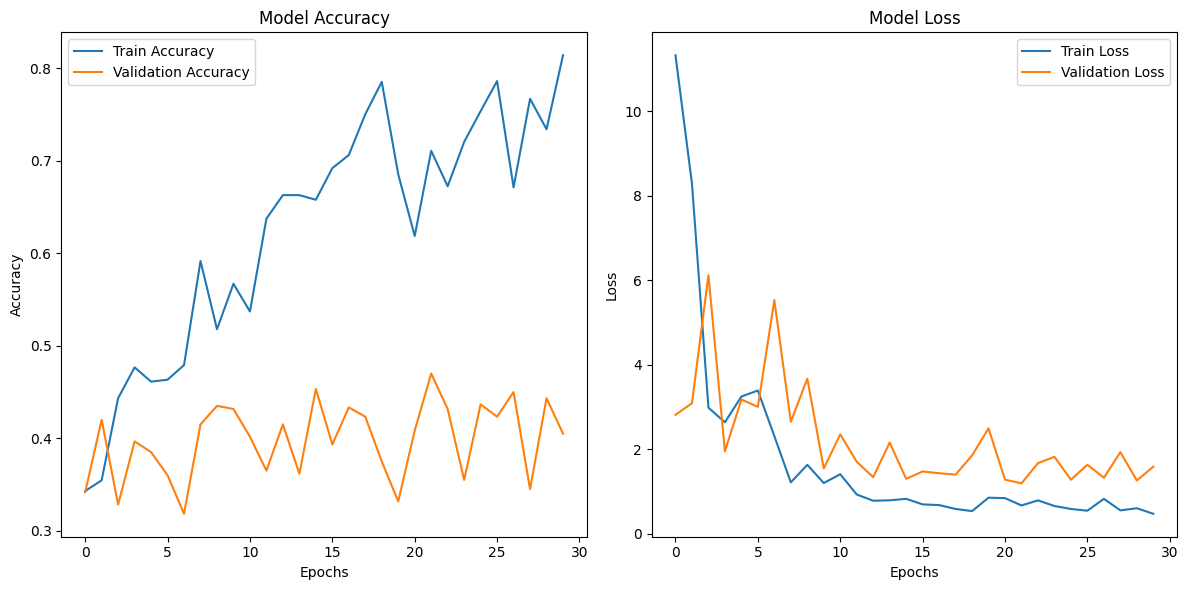

In [2]:
import os
import pandas as pd
import random
from pycocotools.coco import COCO
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Paths for the dataset, annotations, working directory, and images
TRAIN_PATH = 'D:/Download/JDownloader/MSCOCO/images/train2017'
VAL_PATH = 'D:/Download/JDownloader/MSCOCO/images/val2017'
ANNOTATIONS_PATH = 'D:/Download/JDownloader/MSCOCO/annotations'
WORKING_DIR = 'D:/Projetos/Mestrado/2024_Topicos_Esp_Sist_Informacao/ARTIGO_FINAL/object_detection_model_compare/working'
FILTERED_CATEGORIES = ['person', 'cat', 'dog']

# Load COCO annotations
annotations_file = os.path.join(ANNOTATIONS_PATH, 'instances_train2017.json')
coco = COCO(annotations_file)

# Get category IDs for the selected categories
category_ids = coco.getCatIds(catNms=FILTERED_CATEGORIES)

# Generate filtered dataset to train the model
filtered_data = []
for category_id in category_ids:
    ann_ids = coco.getAnnIds(catIds=[category_id])
    anns = coco.loadAnns(ann_ids)
    selected_anns = random.sample(anns, min(1000, len(anns)))
    for ann in selected_anns:
        image_info = coco.loadImgs(ann['image_id'])[0]
        filtered_data.append({
            "image_id": ann['image_id'],
            "image": image_info['file_name'],
            "category_id": ann['category_id']
        })

# Save filtered data to CSV
filtered_csv_path = os.path.join(WORKING_DIR, 'filtered_coco.csv')
filtered_df = pd.DataFrame(filtered_data)
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"Filtered dataset saved to {os.path.abspath(filtered_csv_path)}") 

# Split the filtered dataset
data = pd.read_csv(filtered_csv_path)

# Split into training and testing datasets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the split datasets
train_csv_path = os.path.join(WORKING_DIR, 'train_data.csv')
test_csv_path = os.path.join(WORKING_DIR, 'test_data.csv')

train_data.to_csv(train_csv_path, index=False)
test_data.to_csv(test_csv_path, index=False)

print(f"Training dataset saved to {os.path.abspath(train_csv_path)}")
print(f"Testing dataset saved to {os.path.abspath(test_csv_path)}")   

# Preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize
    return image

# Load images and labels
def load_data(data, path_prefix, target_size=(224, 224)):
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(path_prefix, row['image'])
        images.append(preprocess_image(image_path, target_size))
        labels.append(row['category_id'])
    return np.array(images), np.array(labels)

X_train, y_train = load_data(train_data, TRAIN_PATH)
X_test, y_test = load_data(test_data, TRAIN_PATH)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Define Faster R-CNN model
faster_rcnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(FILTERED_CATEGORIES), activation='softmax')
])

# Compile model
faster_rcnn_model.compile(optimizer='adam', 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

faster_rcnn_model.summary()

# Train the model
history = faster_rcnn_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Save the trained model
model_path = os.path.join(WORKING_DIR, 'faster_rcnn_coco.keras')
faster_rcnn_model.save(model_path)
print(f"Trained model saved at {model_path}")

# Plot training accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
